In [701]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *
# from sklearn.pipeline import make_pipeline
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression

In [702]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [703]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      84967 non-null  int64  
 1   Gender                                  84967 non-null  object 
 2   Age                                     84967 non-null  int64  
 3   Customer Type                           84967 non-null  object 
 4   Type of Travel                          84967 non-null  object 
 5   Class                                   84967 non-null  object 
 6   Flight Distance                         84967 non-null  int64  
 7   Departure Delay                         84967 non-null  int64  
 8   Arrival Delay                           84705 non-null  float64
 9   Departure and Arrival Time Convenience  84967 non-null  int64  
 10  Ease of Online Booking                  84967 non-null  in

In [704]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['ID',
 'Age',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [705]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
target_col = 'Satisfaction'

data['Satisfaction'] = data['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})
data_test_origin = pd.DataFrame()
data_test_origin['ID'] = data_test['ID']

In [706]:
# #посмотрим какие значения в каком стобце выводят
# for i in num_cols:
#   print(f"{i}: {data[i].unique()}")
# for i in cat_cols:
#   print(f"{i}: {data[i].unique()}")

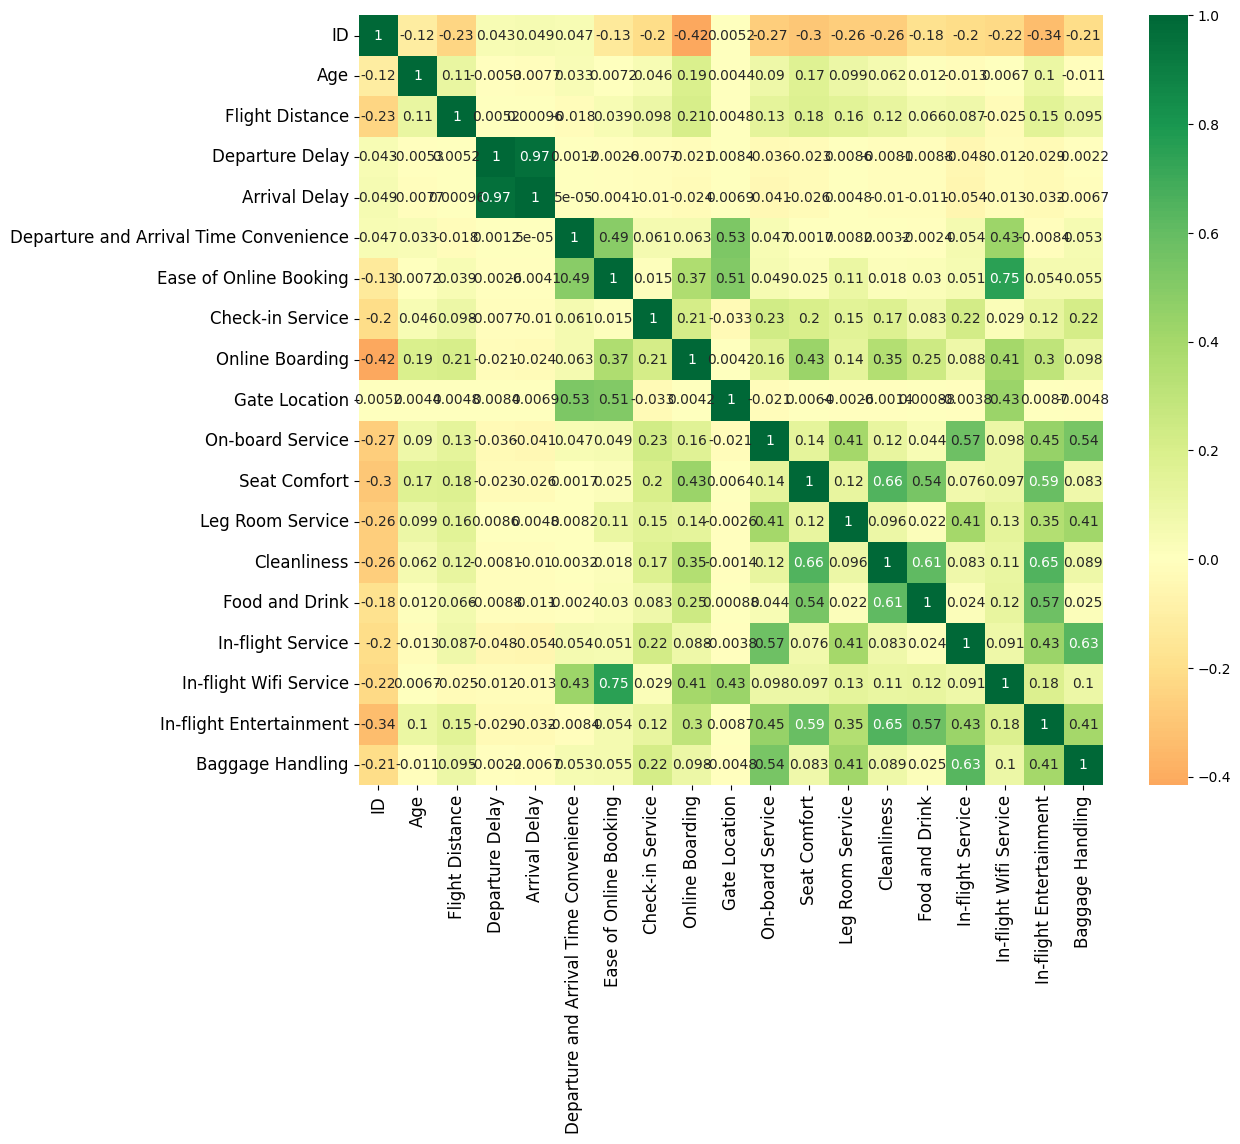

In [707]:
plt.figure(figsize=(12,10))
sns.heatmap(data[num_cols].corr(),
            xticklabels=data[num_cols].corr().columns,
            yticklabels=data[num_cols].corr().columns,
            cmap='RdYlGn',
            center=0,
            annot=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [708]:
data.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,262
Departure and Arrival Time Convenience,0


In [709]:
check = pd.DataFrame()
check['del'] = abs(data['Arrival Delay']-data['Departure Delay'])
check['del']
# (data.shape[0] - similar.sum() ) / data.shape[0]

,del
0,0.0
1,2.0
2,0.0
3,0.0
4,0.0
...,...
84962,0.0
84963,0.0
84964,0.0
84965,4.0


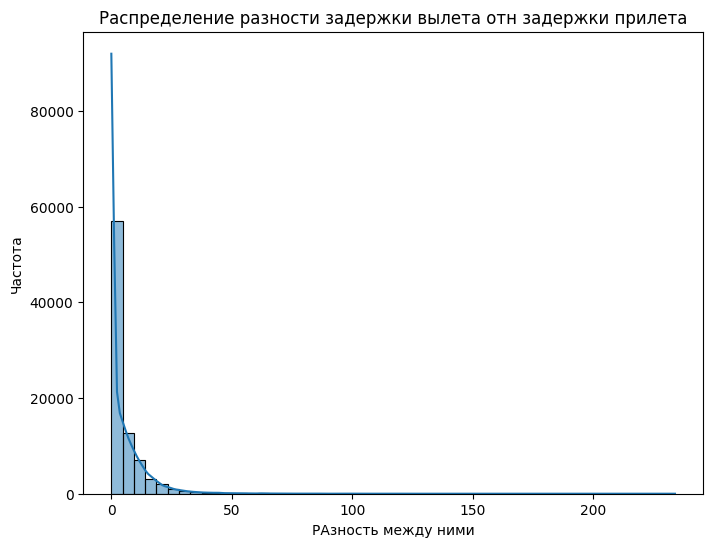

In [710]:
plt.figure(figsize=(8, 6))
sns.histplot(check['del'], kde=True, bins = 50)
plt.title('Распределение разности задержки вылета отн задержки прилета')
plt.xlabel('РАзность между ними')
plt.ylabel('Частота')
plt.show()

In [711]:
# data.drop(columns=['Arrival Delay'], inplace=True)
# data_test.drop(columns=['Arrival Delay'], inplace=True)

# data['Arrival Delay'].value_counts() - 0.0	48902 / 1.0	1843

# data['Arrival Delay'].fillna(0.0, inplace=True)
# data_test['Arrival Delay'].fillna(0.0, inplace=True)

# data['Arrival Delay'].fillna(data['Departure Delay'], inplace=True)
# data_test['Arrival Delay'].fillna(data_test['Departure Delay'], inplace=True)

# data.dropna(subset=['Arrival Delay'])
# data_test.dropna(subset=['Arrival Delay'])

train_data = data.dropna(subset=['Arrival Delay'])

X_train = train_data[['Departure Delay']]
y_train = train_data['Arrival Delay']

model = LinearRegression()
model.fit(X_train, y_train)

missing_data = data[data['Arrival Delay'].isnull()]
missing_data_test = data_test[data_test['Arrival Delay'].isnull()]

if not missing_data.empty:
    predicted_values = model.predict(missing_data[['Departure Delay']])
    data.loc[data['Arrival Delay'].isnull(), 'Arrival Delay'] = predicted_values

if not missing_data_test.empty:
    predicted_values = model.predict(missing_data_test[['Departure Delay']])
    data_test.loc[data_test['Arrival Delay'].isnull(), 'Arrival Delay'] = predicted_values

In [712]:
num_cols = ['ID',
 'Age',
 'Flight Distance',
 'Departure Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [713]:
# нормализация числовых признаков
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
data_test[num_cols] = scaler.transform(data_test[num_cols])

# кодирование категориальных признаков с помощью OneHotEncoder
# использоване LabelEncoder не вижу необходимым тк данные принимают
# значение да/нет либо делятся на группы не зависимые между собой (что то чего то больше и тд)
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_test = pd.get_dummies(data_test, columns=cat_cols, drop_first=True)

data

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,-0.200058,0.405847,0.297214,-0.374232,0.0,-1.323639,-1.261901,1.277963,0.373697,-1.510364,...,1.079773,-1.305182,1.124183,1.082702,1,True,True,False,False,False
1,0.588311,-0.700083,0.079360,0.425175,32.0,1.283323,1.473983,-1.941746,-1.844440,1.547067,...,-0.642266,-1.305182,-1.967080,-0.630088,0,True,True,False,False,False
2,-1.465354,0.682329,-0.838669,-0.374232,0.0,1.283323,0.790012,0.473036,0.373697,1.547067,...,0.218753,1.493438,0.351368,0.226307,1,False,True,False,False,False
3,-0.074894,0.544088,-1.142142,-0.374232,0.0,-0.020158,0.106041,-1.941746,-1.105061,0.018352,...,1.079773,1.493438,1.124183,1.082702,1,False,True,False,True,False
4,-0.511092,-1.114807,-1.096479,-0.374232,0.0,1.283323,-1.945872,0.473036,-2.583819,0.782709,...,-0.642266,-2.004837,-1.967080,1.082702,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,0.458540,0.613209,0.013719,-0.374232,0.0,-0.020158,0.106041,-0.331891,0.373697,0.018352,...,0.218753,0.793783,-0.421448,0.226307,0,True,False,False,False,False
84963,1.615714,-2.289857,-0.614156,-0.374232,0.0,-0.020158,-0.577930,-1.136818,-1.105061,0.018352,...,0.218753,-0.605527,-1.967080,-0.630088,0,True,True,True,False,True
84964,0.486304,-1.460410,-0.887187,-0.374232,0.0,1.283323,0.106041,1.277963,-0.365682,0.018352,...,1.079773,0.094128,1.124183,1.082702,0,False,True,True,True,False
84965,-1.110411,1.235294,2.044799,-0.134410,5.0,-1.323639,-1.261901,-0.331891,0.373697,-1.510364,...,1.079773,-1.305182,1.124183,1.082702,1,True,True,False,False,False


In [714]:
X = data.drop(columns=target_col)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=0)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f"F1: {np.mean(f1)}")

F1: 0.988440962934658


In [715]:
y_ans = model.predict(data_test)

submission = pd.read_csv( "sample_submit.csv" )
submission['ID'] = data_test_origin['ID']
submission[target_col] = y_ans
submission.to_csv('submission.csv', index = False)

y_ans.sum()

3955